In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy import sparse

# in-cell imports:
# import warnings
# from scipy import stats
# from scipy import spatial
# import pathlib
# from pathlib import Path

%matplotlib inline

In [39]:
adata_qc = ad.read_h5ad('/root/capsule/results/Brain_1_3_TH_ZI_geneQC.h5ad')

In [40]:
adata_qc

AnnData object with n_obs × n_vars = 606012 × 276
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'min_y', 'max_x', 'max_y', 'barcodeCount', 'corrected_x', 'corrected_y', 'origin', 'rotation', 'section', 'animal', 'merscope', 'target_atlas_plate', 'codebook', 'min_genes', 'min_total_reads', 'min_vol', 'genes_detected', 'total_reads', 'total_blanks', 'spot_density', 'max_blank_count', 'blanks_detected', 'cell_qc', 'best.cl', 'cluster_label', 'cluster_id', 'Level1_id_label', 'Level2_id_label', 'class_id_label', 'clean_region_label', 'prob', 'avg.dist', 'avg.path.cor', 'avg.cor', 'cor.zscore', 'division_id_label', 'subclass_id_label', 'supertype_id_label', 'napari_x', 'napari_y', 'is_in_TH_or_ZI'
    uns: 'gene_qc_flags', 'mean_diff_plot_results_flags'
    obsm: 'X_tSNE', 'spatial', 'spatial_cirro', 'spatial_rotated'
    layers: 'log2p', 'raw'

In [41]:
adata_qc.uns['mean_diff_plot_results_flags']

,b1b3_diff_95pctReads_allCells,b1_flagged_95pctReads_allCells,b3_flagged_95pctReads_allCells,b1b3_diff_99pctLogReads_allCells,b1_flagged_99pctLogReads_allCells,b3_flagged_99pctLogReads_allCells,b1b3_diff_99pctLogReads_neurons,b1_flagged_99pctLogReads_neurons,b3_flagged_99pctLogReads_neurons,b1b3_diff_99pctLogReads_nn,...,b3_flagged_99pctLogReads_nn,b1b3_diff_99pctLogReads_exc,b1_flagged_99pctLogReads_exc,b3_flagged_99pctLogReads_exc,b1b3_diff_99pctLogReads_inh,b1_flagged_99pctLogReads_inh,b3_flagged_99pctLogReads_inh,b1b3_diff_95pctReads_diffAsPctOfMean_allCells,b1_flagged_95pctReads_diffAsPctOfMean_allCells,b3_flagged_95pctReads_diffAsPctOfMean_allCells
Trhde,-0.675785,False,False,-0.440102,False,False,-0.385731,False,False,-0.245763,...,False,-0.388188,False,False,-0.374968,False,False,-43.313288,False,False
Grp,0.248069,False,False,-0.000856,False,False,-0.121797,False,False,0.195647,...,False,-0.150862,False,False,-0.086431,False,False,-0.085552,False,False
Calcr,0.779578,False,False,0.273323,False,False,0.291019,False,False,0.239820,...,False,0.262532,False,False,0.359328,False,False,27.163437,False,False
Gad2,-0.368328,False,False,-0.033509,False,False,-0.021409,False,False,0.080565,...,False,-0.056860,False,False,-0.015975,False,False,-3.350547,False,False
Pth2r,0.126687,False,False,0.178649,False,False,0.234005,False,False,0.090146,...,False,0.227384,False,False,0.112199,False,False,17.817510,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rxfp1,0.467413,False,False,-0.257056,False,False,-0.327628,False,False,0.395913,...,False,-0.359911,False,False,0.705603,False,True,-25.565016,False,False
Rmst,-0.881739,False,False,-0.281724,False,False,-0.259001,False,False,-0.257162,...,False,-0.261870,False,False,-0.244039,False,False,-27.987534,False,False
Gal,0.057899,False,False,-0.080842,False,False,-0.126114,False,False,0.018983,...,False,-0.120337,False,False,-0.182263,False,False,-8.079840,False,False
Adgrf5,-0.284250,False,False,-0.102807,False,False,0.093523,False,False,-0.181750,...,False,0.099417,False,False,-0.394084,False,False,-10.271652,False,False


In [2]:
wmb_prelim_genes_df = pd.read_csv('/root/capsule/resources/brain3_PreliminaryGeneList_testmousewb_fromBrian.csv')

In [3]:
wmb_prelim_genes_df

,Gene Input,Vizgen Gene,Ensemble ID,Transcript,Notes,Abundance,Target Regions,Type
0,ENSMUST00000000033,Igf2,ENSMUSG00000048583,ENSMUST00000000033,NaN,16.476564,58,MERFISH
1,ENSMUST00000000188,Ccnd2,ENSMUSG00000000184,ENSMUST00000000188,NaN,10.042047,166,MERFISH
2,ENSMUST00000000219,Th,ENSMUSG00000000214,ENSMUST00000000219,NaN,8.665689,56,MERFISH
3,ENSMUST00000000253,Lhx2,ENSMUSG00000000247,ENSMUST00000000253,NaN,9.807290,51,MERFISH
4,ENSMUST00000000275,Glra3,ENSMUSG00000038257,ENSMUST00000000275,NaN,2.093097,130,MERFISH
...,...,...,...,...,...,...,...,...
495,ENSMUST00000233296,Cdkn1a,ENSMUSG00000023067,ENSMUST00000233296,NaN,9.571591,63,MERFISH
496,ENSMUST00000233916,Qpct,ENSMUSG00000024084,ENSMUST00000233916,NaN,3.524749,57,MERFISH
497,ENSMUST00000234410,Zfp521,ENSMUSG00000024420,ENSMUST00000234410,NaN,2.637196,61,MERFISH
498,ENSMUST00000237521,Gal,ENSMUSG00000024907,ENSMUST00000237521,NaN,3.670017,63,MERFISH


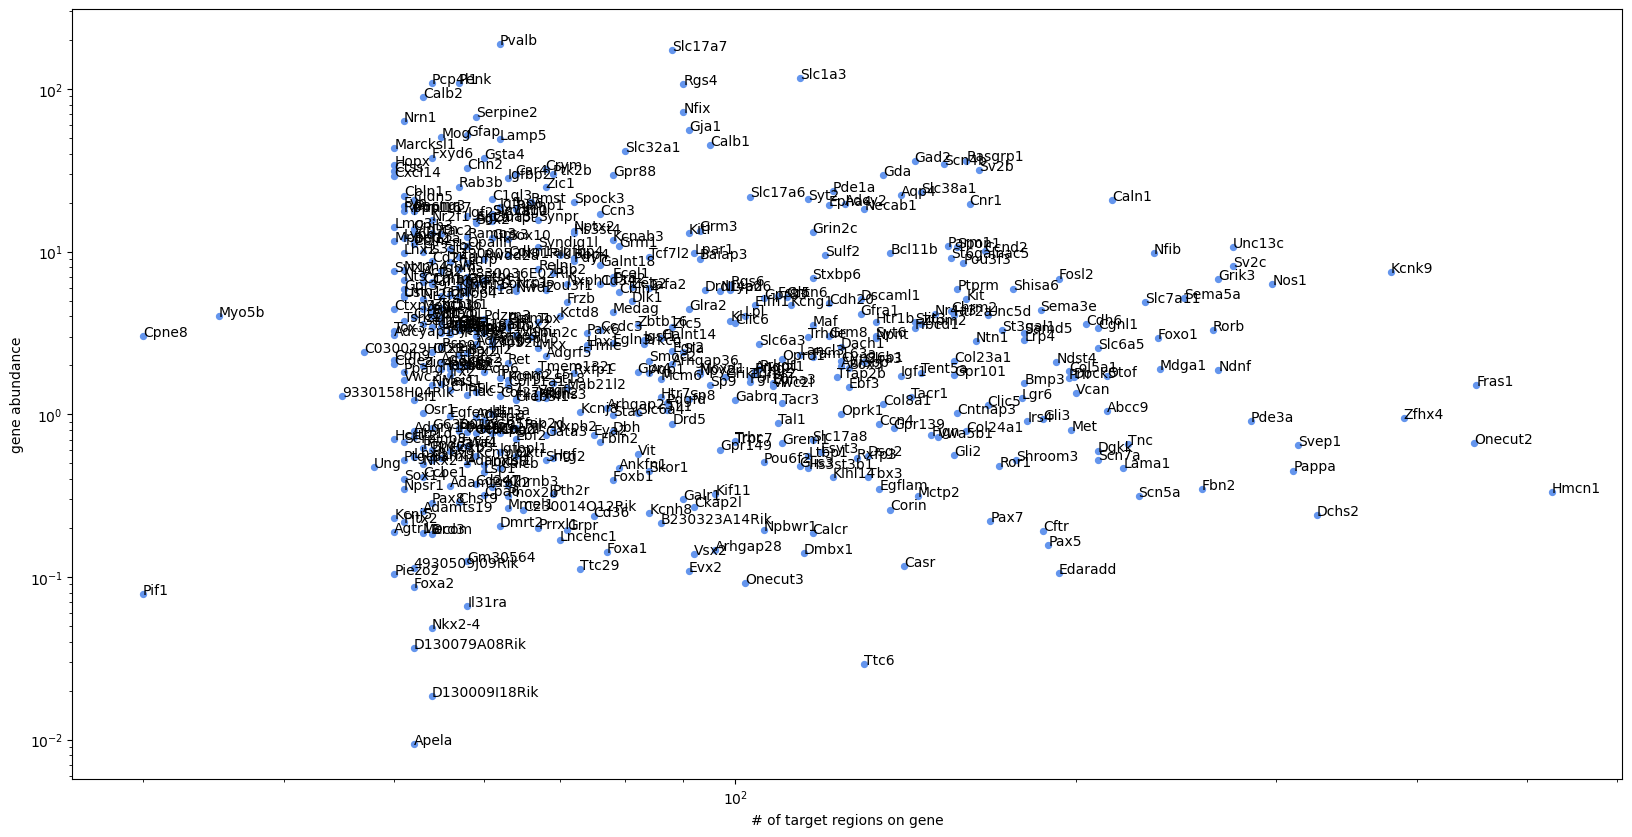

In [37]:
# Plot gene # of probe target regions vs gene abundance
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
sc = ax.scatter(wmb_prelim_genes_df['Target Regions'], 
                wmb_prelim_genes_df['Abundance'],
                s=18, color='cornflowerblue')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('gene abundance')
ax.set_xlabel('# of target regions on gene')


for gene in wmb_prelim_genes_df['Vizgen Gene'].tolist():
    curr_row = wmb_prelim_genes_df[wmb_prelim_genes_df['Vizgen Gene']==gene]
    ax.annotate(gene, (curr_row['Target Regions'], curr_row['Abundance']), 
                fontsize=10, color='k')
    
plt.show()